# Data Analysis for NBA Play-by-Play Dataset

## Using Pandas library

In [1]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

## Reading data sample

In [3]:
df = pd.read_csv("https://sports-statistics.com/database/basketball-data/nba/2000-01_pbp.csv") 

## Data Preview

In [4]:
df

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,0,20001116,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12:11 PM
1,1,0,10,1,20001116,Jump Ball Grant vs. Mutombo: Tip to Hill,NaN,12:00,1,4.0,...,238,Tyrone Hill,PHI,Philadelphia,1.610613e+09,76ers,NaN,NaN,NaN,12:12 PM
2,2,1,1,2,20001116,NaN,NaN,11:45,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Iverson 21' Jump Shot (2 PTS),12:13 PM
3,3,1,6,3,20001116,NaN,NaN,11:28,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hill P.FOUL (P1.T1),12:13 PM
4,4,1,1,4,20001116,Mason 17' Jump Shot (2 PTS),NaN,11:19,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 2,TIE,NaN,12:13 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537152,397,4,1,412,20000744,Allen Tip Shot (30 PTS),NaN,0:32,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,103 - 93,-10,NaN,2:39 PM
537153,398,1,5,414,20000744,Robinson STEAL (2 STL),NaN,0:16,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wesley Bad Pass Turnover (P2.T16),2:39 PM
537154,399,1,2,415,20000744,MISS Thomas 27' 3PT Jump Shot,NaN,0:07,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2:39 PM
537155,400,0,4,416,20000744,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Campbell REBOUND (Off:4 Def:6),2:39 PM


In [5]:
df.iloc[2]

Unnamed: 0                                               2
EVENTMSGACTIONTYPE                                       1
EVENTMSGTYPE                                             1
EVENTNUM                                                 2
GAME_ID                                           20001116
HOMEDESCRIPTION                                        NaN
NEUTRALDESCRIPTION                                     NaN
PCTIMESTRING                                         11:45
PERIOD                                                   1
PERSON1TYPE                                            5.0
PERSON2TYPE                                              0
PERSON3TYPE                                              0
PLAYER1_ID                                             947
PLAYER1_NAME                                 Allen Iverson
PLAYER1_TEAM_ABBREVIATION                              PHI
PLAYER1_TEAM_CITY                             Philadelphia
PLAYER1_TEAM_ID                               1610612755

## Event Type Counts

In [6]:
(
    df
    [['Unnamed: 0','EVENTMSGTYPE']]
    .groupby('EVENTMSGTYPE')
    .count()
)

,Unnamed: 0
EVENTMSGTYPE,
1,84865
2,106799
3,59138
4,121733
5,35785
6,55134
7,2903
8,43037
9,15815


## Helper functions

### Get Textual Description Columns

In [7]:
def get_description_columns(type_code):
    description_columns = (
        df
        [['EVENTMSGTYPE','HOMEDESCRIPTION','VISITORDESCRIPTION','NEUTRALDESCRIPTION']]
        .query(f'EVENTMSGTYPE == {type_code}')
        .fillna('')
        .assign(combined_text = lambda r : r.HOMEDESCRIPTION + ' ' + r.VISITORDESCRIPTION + ' ' +r.NEUTRALDESCRIPTION)
        ['combined_text']
        .to_list()
    )
    return description_columns

In [8]:
descriptions = get_description_columns(4)
descriptions[:10]

['Mason REBOUND (Off:0 Def:1)  ',
 ' Snow REBOUND (Off:0 Def:1) ',
 'Grant REBOUND (Off:0 Def:1)  ',
 ' Hill REBOUND (Off:0 Def:1) ',
 'Mason REBOUND (Off:0 Def:2)  ',
 ' Hill REBOUND (Off:0 Def:2) ',
 ' Mutombo REBOUND (Off:0 Def:1) ',
 'Mason REBOUND (Off:0 Def:3)  ',
 ' Hill REBOUND (Off:0 Def:3) ',
 'Majerle REBOUND (Off:0 Def:1)  ']

### Creating Word Cloud

In [9]:
!pip install matplotlib 
!pip install pillow==9.0.1 wordcloud==1.8.1

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert to a single string
text = ' '.join(descriptions)
# Function to tokenize and clean text
def preprocess_text(text):
    # Split text into words and convert to lowercase
    words = text.lower().split()
    # Remove common stop words
    return ' '.join(words)
# Preprocess the combined text
processed_text = preprocess_text(text)

# Generate the word cloud
def generateWordCloud(processed_text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

## Generating Word Cloud for each event type

 Word Cloud for event type: 1


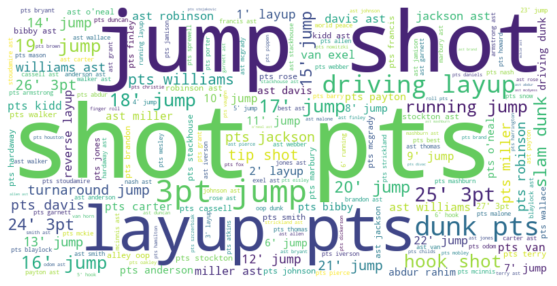

 Word Cloud for event type: 2


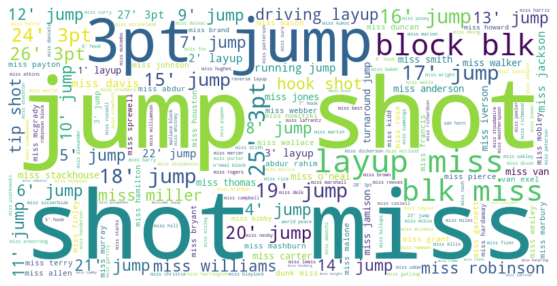

 Word Cloud for event type: 3


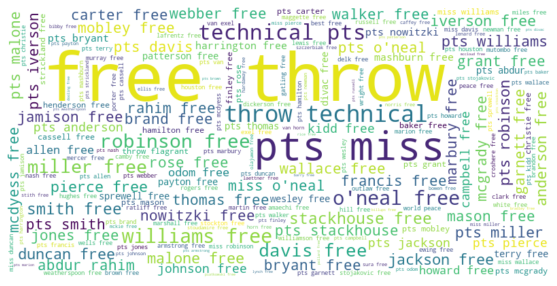

 Word Cloud for event type: 4


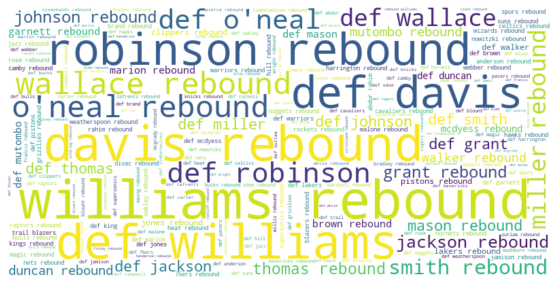

 Word Cloud for event type: 5


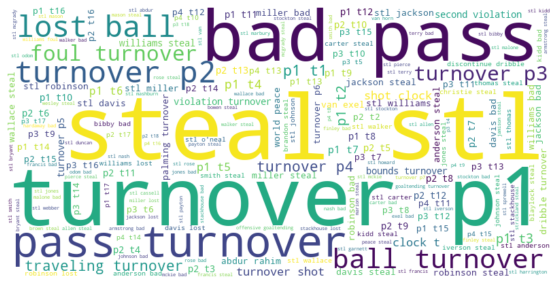

 Word Cloud for event type: 6


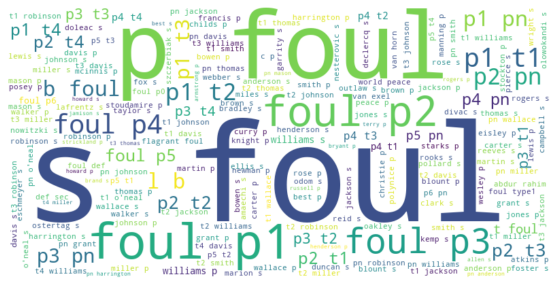

 Word Cloud for event type: 7


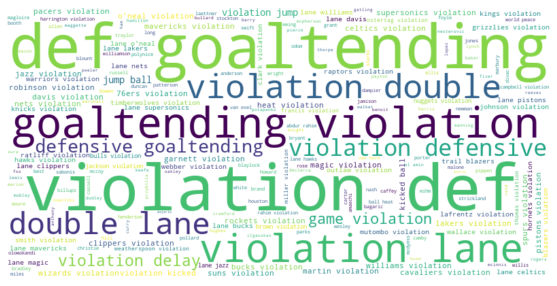

 Word Cloud for event type: 8


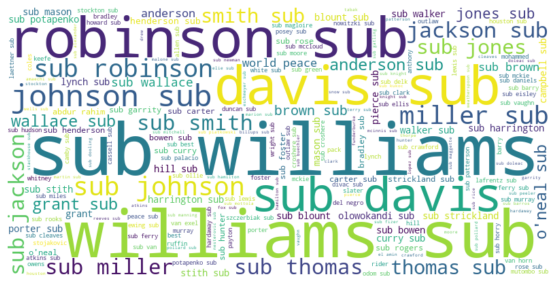

 Word Cloud for event type: 9


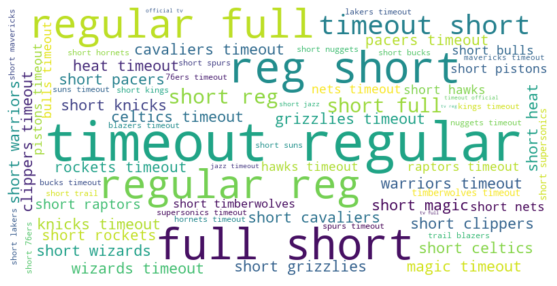

 Word Cloud for event type: 10


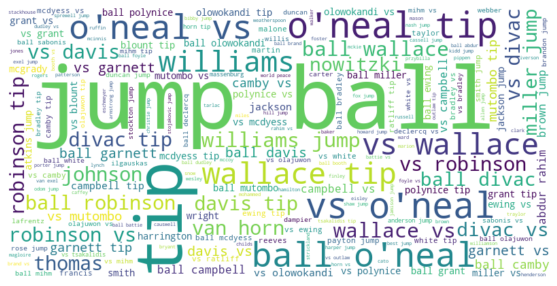

 Word Cloud for event type: 11


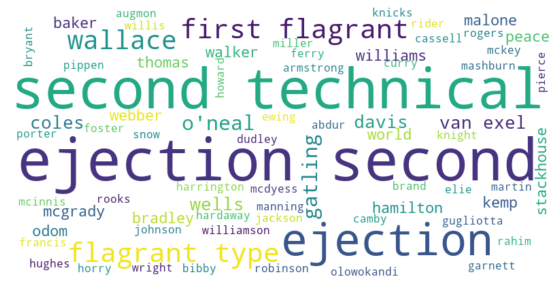

 Word Cloud for event type: 12
Error
 Word Cloud for event type: 13
Error


In [11]:
for event_type in sorted(df.EVENTMSGTYPE.unique()):
    print(f' Word Cloud for event type: {event_type}')
    descriptions = get_description_columns(event_type)
    # Convert to a single string
    text = ' '.join(descriptions)
    processed_text = preprocess_text(text)
    try:
        generateWordCloud(processed_text)
    except :
        print("Error")